## OCR scanner project

In [239]:
import numpy as np
import cv2
import imutils
from matplotlib import pyplot as plt

## Pre-processing the image

In [240]:
def show_img(img):
  fig = plt.gcf()
  fig.set_size_inches(20, 10)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

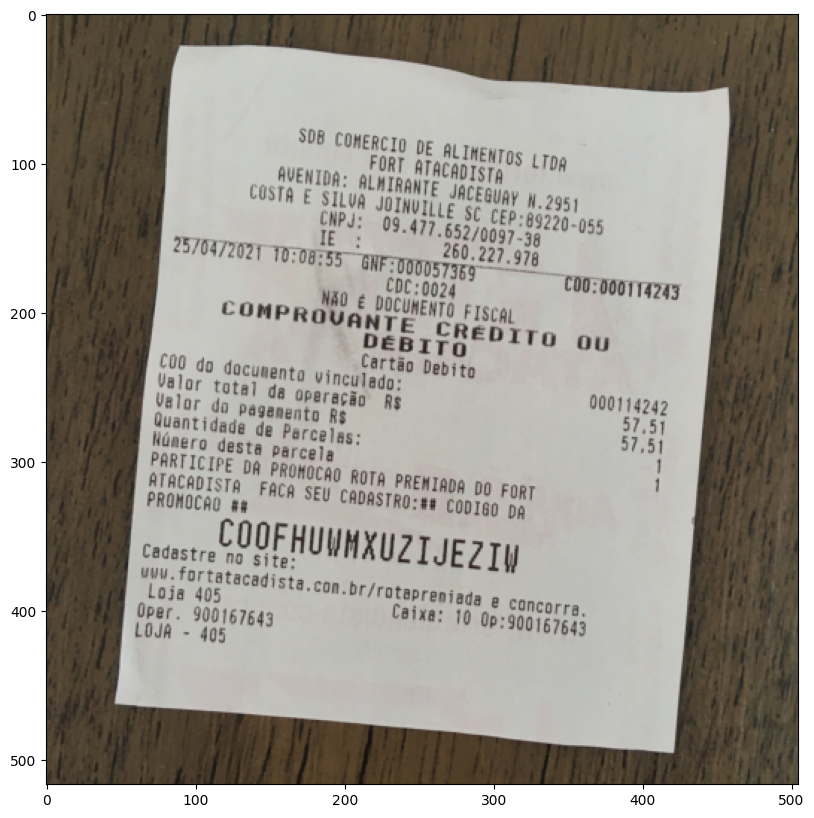

517 505


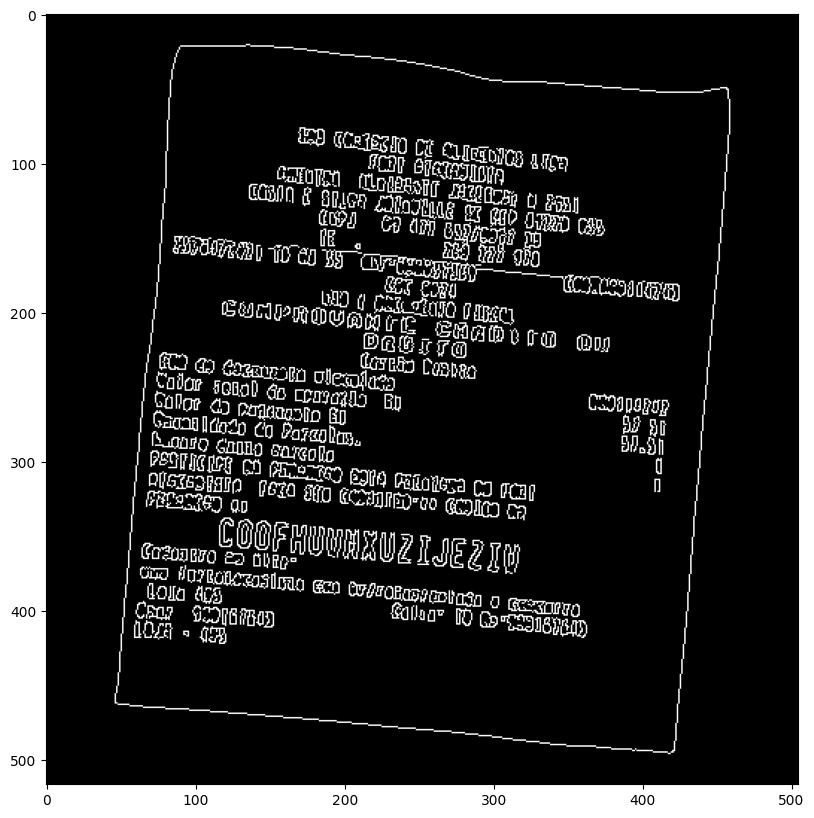

In [241]:
img = cv2.imread('./receipts/4.png')

original = img.copy()

show_img(img)

# print the shape of the image
(H, W) = img.shape[:2]
print(H, W)

# to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# show_img(gray)

# to remove noises
blur = cv2.GaussianBlur(gray, (5, 5), 0)
# show_img(blur)

# to detect the borders
edged = cv2.Canny(blur, 60, 160)
show_img(edged)


### Countours detection

In [242]:
def find_contours(img):
  conts = cv2.findContours(img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
  conts = imutils.grab_contours(conts)
  conts = sorted(conts, key = cv2.contourArea, reverse = True)[:6]
  return conts

In [243]:
conts = find_contours(edged.copy())

## Locatting the biggest contour
- Douglas-Peucker: http://en.wikipedia.org/wiki/Ramer-Douglas-Peucker_algorithm

In [244]:
# to find close contours

from re import A
for c in conts:
  perimeter = cv2.arcLength(c, True)
  approximation = cv2.approxPolyDP(c, 0.02 * perimeter, True)
  if len(approximation) == 4:
    larger = approximation
    break
                                       

In [245]:
larger

array([[[ 90,  21]],

       [[ 46, 462]],

       [[420, 495]],

       [[457,  50]]], dtype=int32)

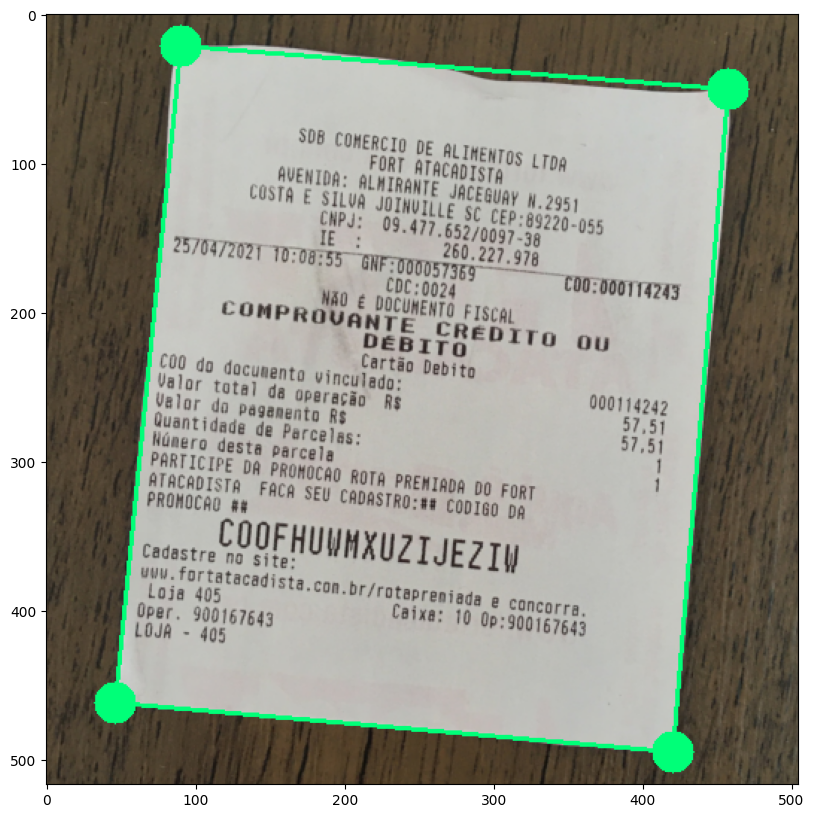

In [246]:
cv2.drawContours(img, larger, -1, (120,255,0), 28)
cv2.drawContours(img, [larger], -1, (120,255,0), 2)
show_img(img)

## Sorting the points
- top left
- top right
- bottom right
- bottom left

In [247]:
def sort_points(points):
  points = points.reshape((4, 2))
  new_points = np.zeros((4, 1, 2), dtype=np.int32)
  # add the values of the rows
  add = points.sum(1)
  new_points[0] = points[np.argmin(add)]
  new_points[2] = points[np.argmax(add)]
  dif = np.diff(points, axis=1)
  new_points[1] = points[np.argmin(dif)]
  new_points[3] = points[np.argmax(dif)]
  return new_points

In [248]:
points_larger = sort_points(larger)
points_larger

array([[[ 90,  21]],

       [[457,  50]],

       [[420, 495]],

       [[ 46, 462]]], dtype=int32)

## Transformation matrix

In [249]:
pts1 = np.float32(points_larger)
pts2 = np.float32([[0,0], [W,0], [W,H], [0,H]])

# matrix is the transformation matrix that can be used to warp the image
matrix = cv2.getPerspectiveTransform(pts1, pts2)
matrix



array([[ 1.37910380e+00,  1.37597658e-01, -1.27008893e+02],
       [-9.39728068e-02,  1.18924207e+00, -1.65165309e+01],
       [ 1.70681096e-05,  4.68262760e-05,  1.00000000e+00]])

## Perspective transformation

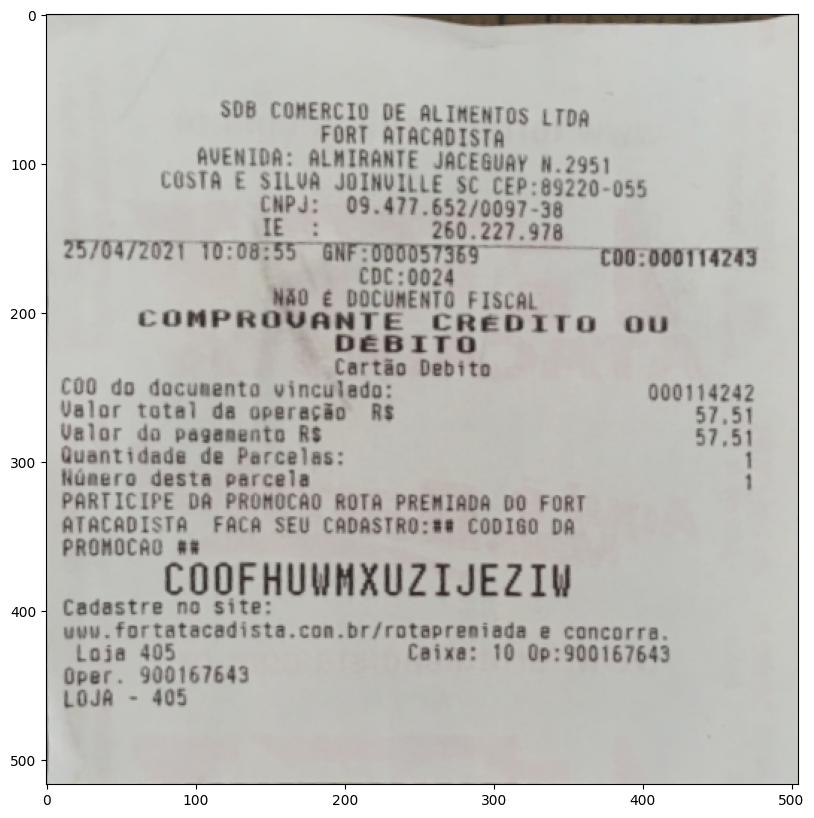

In [250]:
transform = cv2.warpPerspective(original, matrix, (W, H))
show_img(transform)

## OCR with Tesseract

In [256]:
import os
import pytesseract
from pytesseract import Output
from pprint import pprint

pytesseract.pytesseract.tesseract_cmd = r'/usr/local/bin/tesseract'
os.environ['TESSDATA_PREFIX'] = '/usr/local/Cellar/tesseract-lang/4.1.0/share/tessdata'
custom_config = r'--tessdata-dir "/usr/local/Cellar/tesseract-lang/4.1.0/share/tessdata"'

text = pytesseract.image_to_string(transform, lang='spa', config=custom_config)
pprint(text)

('S0B COMERCIO DE CIENTOS LTDA\n'
 'FORT ATACAD\n'
 'AVENIDA: ALMIRANTE  AcEelar 1.2951\n'
 'COSTA E ma SOLE m7 Ses 89220-055\n'
 '\n'
 '19.477.6\n'
 'd Ei\n'
 'ISIOAT2021 TOTES EEES —CO0:000114243\n'
 '\n'
 'MAD €  UEDRENO FISCAL\n'
 'COMPROVA CREDITO 06\n'
 'DEBIO\n'
 '\n'
 'Cartáo Debito\n'
 '\n'
 'C00 do documento vinculado: 00011424:\n'
 'Valor total de Ch Rs 57,5\n'
 'Valor da 57.5\n'
 '\n'
 'into R$\n'
 'Quantidada de Parcelas:\n'
 'Núnero desta parcela\n'
 'PARTICIPE DA PROMOCAO ROTA PREMIADA DO FORT\n'
 'ATACADISTA FACA SEU CADASIRO:88 CODIGO DA\n'
 'PRONOCAO an\n'
 '\n'
 'COOFHUWMXUZTJEZ 10\n'
 '\n'
 'esosics no si\n'
 'oristacadisia. com.br/rotas\n'
 'loja Caixa\n'
 'Oper. 0167643\n'
 '\n'
 'LOJA - 405\n'
 '\n'
 'lada e concorra.\n'
 '10 0p:900167643\n'
 '\n')


In [257]:
increase = cv2.resize(transform, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_CUBIC)

text = pytesseract.image_to_string(transform, lang='spa', config=custom_config)
pprint(text)

('S0B COMERCIO DE CIENTOS LTDA\n'
 'FORT ATACAD\n'
 'AVENIDA: ALMIRANTE  AcEelar 1.2951\n'
 'COSTA E ma SOLE m7 Ses 89220-055\n'
 '\n'
 '19.477.6\n'
 'd Ei\n'
 'ISIOAT2021 TOTES EEES —CO0:000114243\n'
 '\n'
 'MAD €  UEDRENO FISCAL\n'
 'COMPROVA CREDITO 06\n'
 'DEBIO\n'
 '\n'
 'Cartáo Debito\n'
 '\n'
 'C00 do documento vinculado: 00011424:\n'
 'Valor total de Ch Rs 57,5\n'
 'Valor da 57.5\n'
 '\n'
 'into R$\n'
 'Quantidada de Parcelas:\n'
 'Núnero desta parcela\n'
 'PARTICIPE DA PROMOCAO ROTA PREMIADA DO FORT\n'
 'ATACADISTA FACA SEU CADASIRO:88 CODIGO DA\n'
 'PRONOCAO an\n'
 '\n'
 'COOFHUWMXUZTJEZ 10\n'
 '\n'
 'esosics no si\n'
 'oristacadisia. com.br/rotas\n'
 'loja Caixa\n'
 'Oper. 0167643\n'
 '\n'
 'LOJA - 405\n'
 '\n'
 'lada e concorra.\n'
 '10 0p:900167643\n'
 '\n')


## Improve image quality

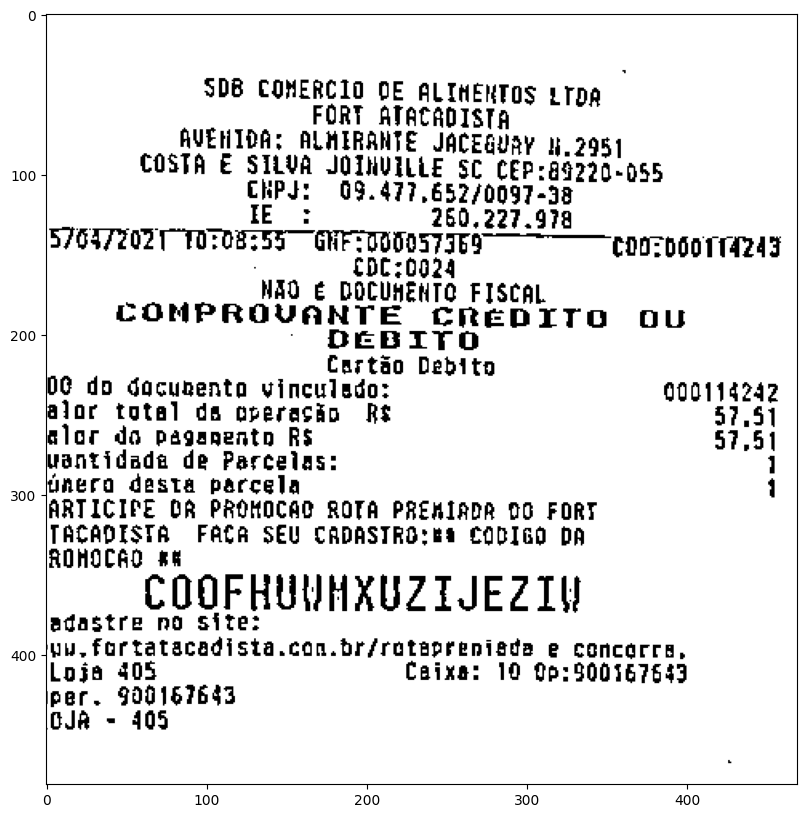

In [264]:
# increasing brightness and contrast of image
b = 50
c = 80
adjust = np.int16(transform)
# equation to apply brightness and contrast
adjust = adjust * (c/127+1) - c + b
# to keep the values between 0 and 255
adjust = np.clip(adjust, 0, 255)
adjust = np.uint8(adjust)

# Adaptive thresholding
processed_img = cv2.cvtColor(transform, cv2.COLOR_BGR2GRAY)
processed_img = cv2.adaptiveThreshold(processed_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9)
# show_img(processed_img)

# Removing edges
margin = 18
img_edges = processed_img[margin: H - margin, margin: W - margin]
show_img(img_edges)


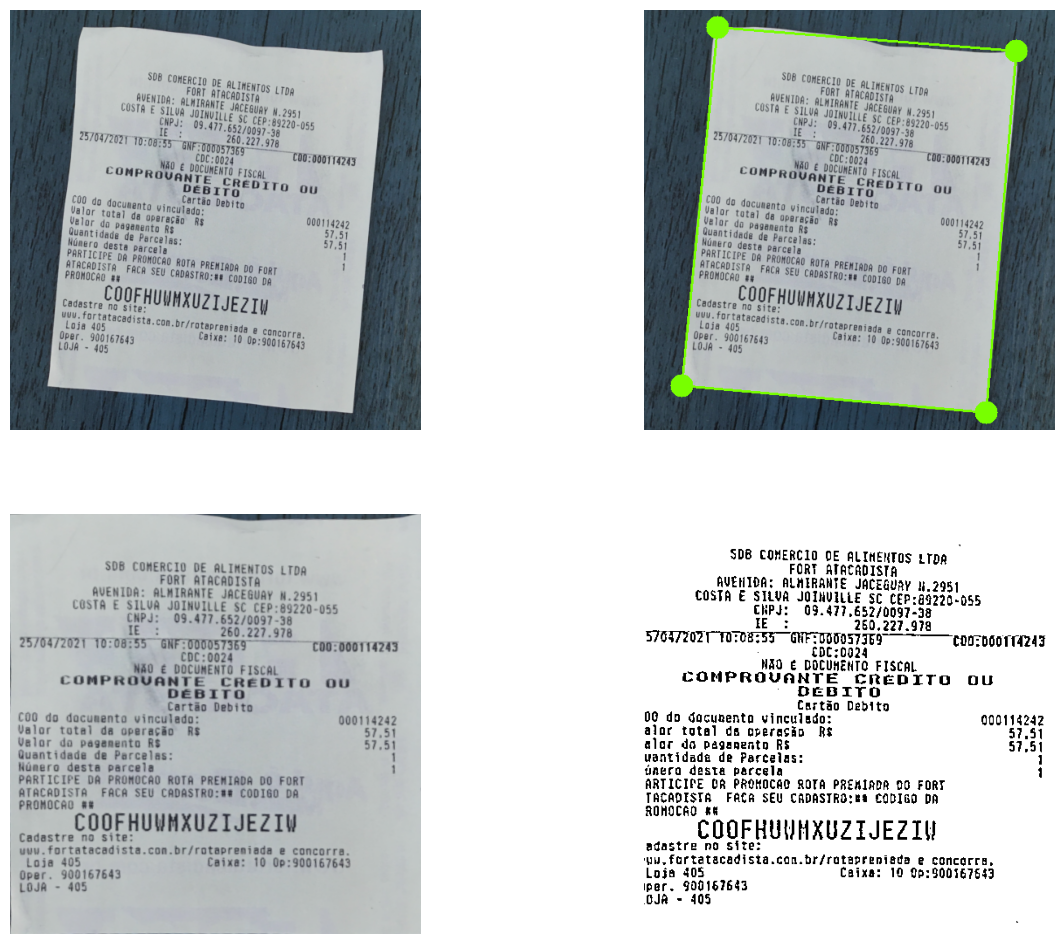

In [265]:
fig, im = plt.subplots(2, 2, figsize=(15,12))
for x in range(2):
  for y in range(2):
    im[x][y].axis('off')
im[0][0].imshow(original)
im[0][1].imshow(img)
im[1][0].imshow(transform, cmap='gray')
im[1][1].imshow(img_edges, cmap='gray')
plt.show();

## All together

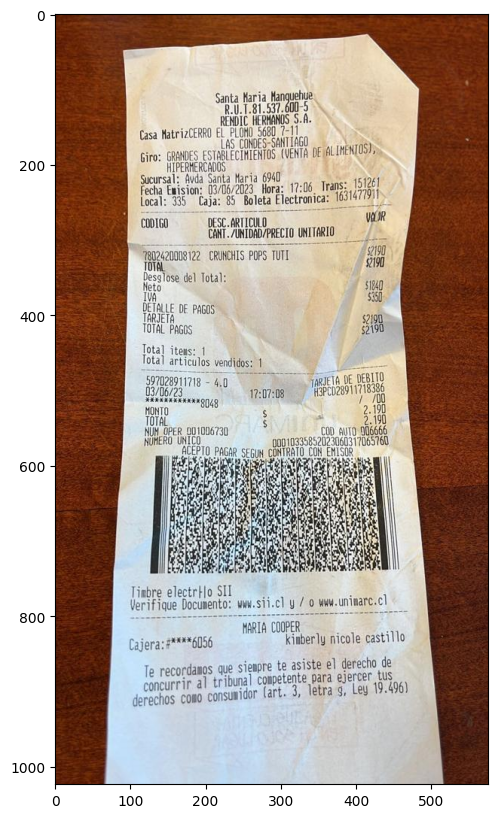

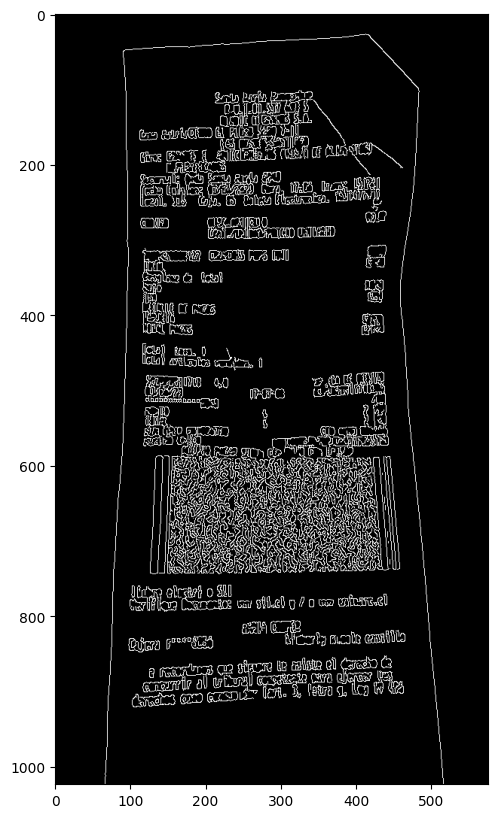

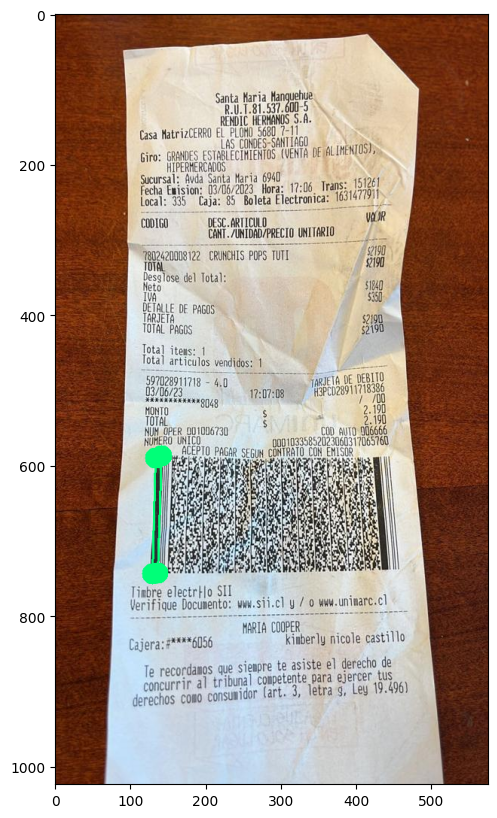

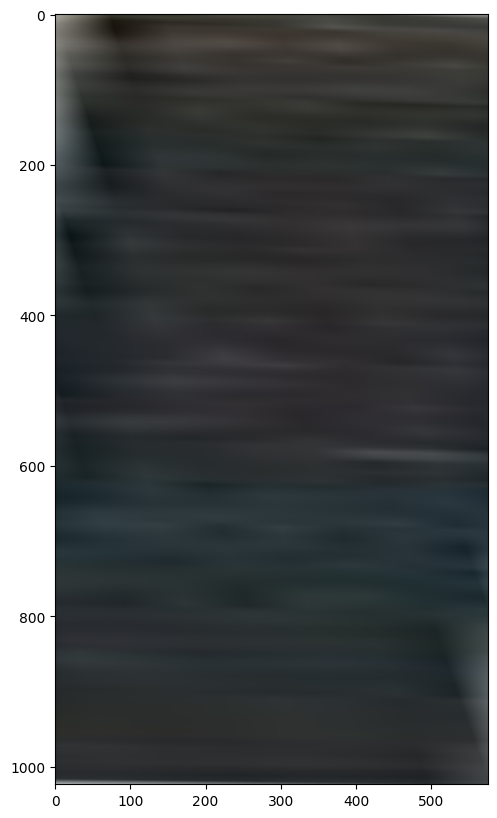

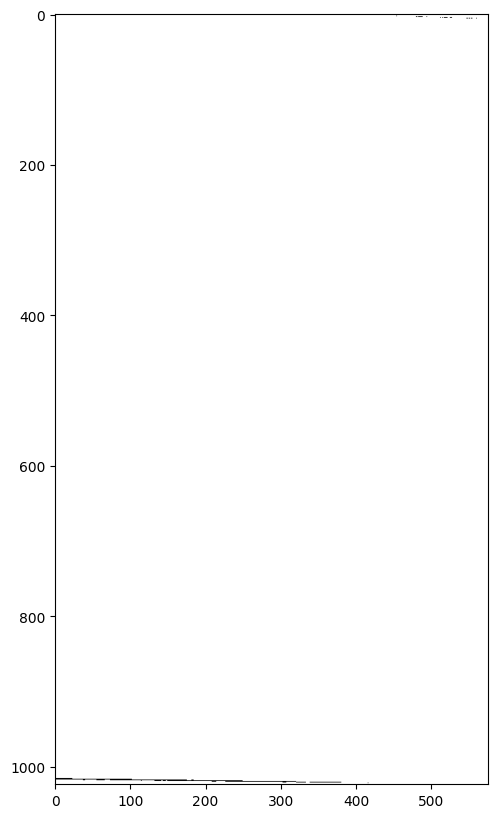

In [268]:
def transform_image(image_file):
  img = cv2.imread(image_file)
  original = img.copy()
  show_img(img)
  (H, W) = img.shape[:2]

  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  blur = cv2.GaussianBlur(gray, (7, 7), 0)
  edged = cv2.Canny(blur, 60, 160)
  show_img(edged)
  conts = find_contours(edged.copy())
  for c in conts:
    peri = cv2.arcLength(c, True)
    aprox = cv2.approxPolyDP(c, 0.02 * peri, True)

    if len(aprox) == 4:
      larger = aprox
      break

  cv2.drawContours(img, larger, -1, (120, 255, 0), 28)
  cv2.drawContours(img, [larger], -1, (120, 255, 0), 2)
  show_img(img)

  points_larger = sort_points(larger)
  pts1 = np.float32(points_larger)
  pts2 = np.float32([[0, 0], [W, 0], [W, H], [0, H]])

  matrix = cv2.getPerspectiveTransform(pts1, pts2)
  transform = cv2.warpPerspective(original, matrix, (W, H))

  show_img(transform)
  return transform


def process_img(img):
  processed_img = cv2.resize(img, None, fx=1.6, fy=1.6, interpolation=cv2.INTER_CUBIC)
  processed_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  processed_img = cv2.adaptiveThreshold(processed_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9)
  return processed_img

img = transform_image('./receipts/5.JPG')
img = process_img(img)
show_img(img)